In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
from scipy.stats import linregress

## Create Latitude and Longitude Combinations

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-32.60236242894425 -145.24443424598437
-7.314844119658048 13.439495624261099
18.499296232430595 -65.70275605991824
-49.9390229365277 60.08286795354411
-21.066840897878308 -95.54453781374689
-28.215839729427366 -69.0315916413623
-2.1665704470536724 26.59421156564875
52.40516996743739 32.115204700315644
67.74035976184507 106.75055978350662
13.72722670487613 164.86030150135372
-47.840225828048084 178.96581772737812
85.79982529724461 53.29467156975167
13.81898440169418 172.7937607837091
-81.8160357858293 -132.13534256542374
87.50601393861356 176.35931712411468
73.99218037345199 108.64498683739953
-29.994429123530267 -168.11543452624244
-77.04487787551427 -86.75268416792977
52.81484157826836 150.03526584388572
9.852306609728046 149.6688469841735
-42.991682596098414 -13.402638972875195
-44.08199531790769 70.4428799290344
-68.10886102662968 -167.20637722835534
88.73400766289015 4.745522164451671
-27.826924166161035 177.49053752665014
70.12485424111003 -92.82761851707777
20.52630332288315 54.6

In [5]:
coordinates

[(-32.60236242894425, -145.24443424598437),
 (-7.314844119658048, 13.439495624261099),
 (18.499296232430595, -65.70275605991824),
 (-49.9390229365277, 60.08286795354411),
 (-21.066840897878308, -95.54453781374689),
 (-28.215839729427366, -69.0315916413623),
 (-2.1665704470536724, 26.59421156564875),
 (52.40516996743739, 32.115204700315644),
 (67.74035976184507, 106.75055978350662),
 (13.72722670487613, 164.86030150135372),
 (-47.840225828048084, 178.96581772737812),
 (85.79982529724461, 53.29467156975167),
 (13.81898440169418, 172.7937607837091),
 (-81.8160357858293, -132.13534256542374),
 (87.50601393861356, 176.35931712411468),
 (73.99218037345199, 108.64498683739953),
 (-29.994429123530267, -168.11543452624244),
 (-77.04487787551427, -86.75268416792977),
 (52.81484157826836, 150.03526584388572),
 (9.852306609728046, 149.6688469841735),
 (-42.991682596098414, -13.402638972875195),
 (-44.08199531790769, 70.4428799290344),
 (-68.10886102662968, -167.20637722835534),
 (88.73400766289015

In [6]:
#create a list for holding the cities
cities = []
#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count.
len(cities)

608

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | caxito
Processing Record 3 of Set 1 | luquillo
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | hualmay
Processing Record 6 of Set 1 | copiapo
Processing Record 7 of Set 1 | kindu
Processing Record 8 of Set 1 | klimovo
Processing Record 9 of Set 1 | aykhal
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | waipawa
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | leningradskiy
Processing Record 15 of Set 1 | saskylakh
Processing Record 16 of Set 1 | alofi
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | vostok
Processing Record 19 of Set 1 | lorengau
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | souillac
Processing Record 22 of Set 1 |

Processing Record 39 of Set 4 | puerto escondido
Processing Record 40 of Set 4 | cabo san lucas
Processing Record 41 of Set 4 | one hundred mile house
City not found. Skipping...
Processing Record 42 of Set 4 | kapuskasing
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | atambua
Processing Record 45 of Set 4 | takaka
Processing Record 46 of Set 4 | palmer
Processing Record 47 of Set 4 | bairnsdale
Processing Record 48 of Set 4 | rantepao
Processing Record 49 of Set 4 | ust-shonosha
Processing Record 50 of Set 4 | esperantina
Processing Record 1 of Set 5 | hilo
Processing Record 2 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 5 | half moon bay
Processing Record 4 of Set 5 | pittsburg
Processing Record 5 of Set 5 | ambon
Processing Record 6 of Set 5 | hato mayor
Processing Record 7 of Set 5 | baie-comeau
Processing Record 8 of Set 5 | lompoc
Processing Record 9 of Set 5 | kirgiz-miyaki
Processing Record 10 of Set 5 | maka

Processing Record 29 of Set 8 | kupang
Processing Record 30 of Set 8 | zaragoza
Processing Record 31 of Set 8 | margate
Processing Record 32 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 33 of Set 8 | huambo
Processing Record 34 of Set 8 | olot
Processing Record 35 of Set 8 | nosy varika
Processing Record 36 of Set 8 | waingapu
Processing Record 37 of Set 8 | tiarei
Processing Record 38 of Set 8 | lavrentiya
Processing Record 39 of Set 8 | along
Processing Record 40 of Set 8 | port-gentil
Processing Record 41 of Set 8 | unai
Processing Record 42 of Set 8 | dauphin
Processing Record 43 of Set 8 | turayf
Processing Record 44 of Set 8 | anito
Processing Record 45 of Set 8 | mao
Processing Record 46 of Set 8 | marienburg
Processing Record 47 of Set 8 | launceston
Processing Record 48 of Set 8 | rio gallegos
Processing Record 49 of Set 8 | yerofey pavlovich
Processing Record 50 of Set 8 | clifton
Processing Record 1 of Set 9 | jasper
Processing Record 2 of Set 9 | ayago

Processing Record 18 of Set 12 | isiro
Processing Record 19 of Set 12 | concarneau
Processing Record 20 of Set 12 | steamboat springs
Processing Record 21 of Set 12 | tazmalt
Processing Record 22 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 23 of Set 12 | dicabisagan
Processing Record 24 of Set 12 | moscow
Processing Record 25 of Set 12 | ust-kuyga
Processing Record 26 of Set 12 | zhanaozen
Processing Record 27 of Set 12 | husavik
Processing Record 28 of Set 12 | pao de acucar
Processing Record 29 of Set 12 | general pico
Processing Record 30 of Set 12 | iseyin
Processing Record 31 of Set 12 | sala
Processing Record 32 of Set 12 | batticaloa
Processing Record 33 of Set 12 | moron
Processing Record 34 of Set 12 | nuevo progreso
Processing Record 35 of Set 12 | bentiu
Processing Record 36 of Set 12 | bhuj
Processing Record 37 of Set 12 | sfantu gheorghe
Processing Record 38 of Set 12 | mangan
Processing Record 39 of Set 12 | cornwall
Processing Record 40 of Set 12 

In [9]:
# convert the array of dictionaries to a pandas dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,67.48,48,34,10.49,NZ,2022-10-30 01:01:52
1,Caxito,-8.5785,13.6643,76.77,88,87,2.73,AO,2022-10-30 01:01:52
2,Luquillo,18.3725,-65.7166,81.00,85,100,10.25,PR,2022-10-30 01:01:53
3,Hualmay,-11.0964,-77.6139,62.10,81,4,9.28,PE,2022-10-30 01:01:53
4,Copiapo,-27.3667,-70.3333,53.29,59,0,1.92,CL,2022-10-30 01:01:54
5,Kindu,-2.9500,25.9500,70.36,99,100,0.45,CD,2022-10-30 01:01:54
6,Klimovo,52.3805,32.1923,52.18,85,100,17.36,RU,2022-10-30 01:01:55
7,Aykhal,66.0000,111.5000,6.24,96,100,9.60,RU,2022-10-30 01:01:56
8,Butaritari,3.0707,172.7902,81.41,67,94,13.42,KI,2022-10-30 01:01:56
9,Waipawa,-41.4122,175.5153,64.81,65,100,14.61,NZ,2022-10-30 01:01:57


In [10]:
new_column_order =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-10-30 01:01:52,-46.1927,168.8643,67.48,48,34,10.49
1,Caxito,AO,2022-10-30 01:01:52,-8.5785,13.6643,76.77,88,87,2.73
2,Luquillo,PR,2022-10-30 01:01:53,18.3725,-65.7166,81.00,85,100,10.25
3,Hualmay,PE,2022-10-30 01:01:53,-11.0964,-77.6139,62.10,81,4,9.28
4,Copiapo,CL,2022-10-30 01:01:54,-27.3667,-70.3333,53.29,59,0,1.92
5,Kindu,CD,2022-10-30 01:01:54,-2.9500,25.9500,70.36,99,100,0.45
6,Klimovo,RU,2022-10-30 01:01:55,52.3805,32.1923,52.18,85,100,17.36
7,Aykhal,RU,2022-10-30 01:01:56,66.0000,111.5000,6.24,96,100,9.60
8,Butaritari,KI,2022-10-30 01:01:56,3.0707,172.7902,81.41,67,94,13.42
9,Waipawa,NZ,2022-10-30 01:01:57,-41.4122,175.5153,64.81,65,100,14.61


In [11]:
# create the output file CSV
output_data_file = "./weather_data/cities.csv"
# export the City_Data into a CSV 
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [2]:
# load csv file 
path_to_load = "./weather_data/cities.csv"
city_data_df = pd.read_csv(path_to_load)
#city_data_df = city_data_df.drop(columns="City_ID")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Mataura,NZ,2022-10-30 01:01:52,-46.1927,168.8643,67.48,48,34,10.49
1,1,Caxito,AO,2022-10-30 01:01:52,-8.5785,13.6643,76.77,88,87,2.73
2,2,Luquillo,PR,2022-10-30 01:01:53,18.3725,-65.7166,81.00,85,100,10.25
3,3,Hualmay,PE,2022-10-30 01:01:53,-11.0964,-77.6139,62.10,81,4,9.28
4,4,Copiapo,CL,2022-10-30 01:01:54,-27.3667,-70.3333,53.29,59,0,1.92


## Create plots latitude vs. weather characteristic

In [5]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

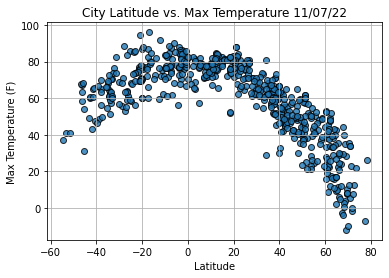

In [6]:
# build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="k", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./weather_data/Fig1.png")

# show plot
plt.show()

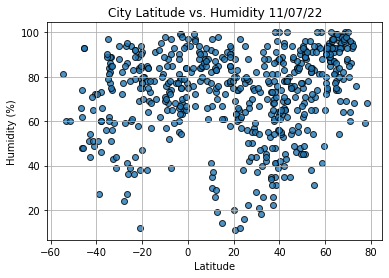

In [7]:
# build the scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="k", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./weather_data/Fig2.png")

# show plot
plt.show()

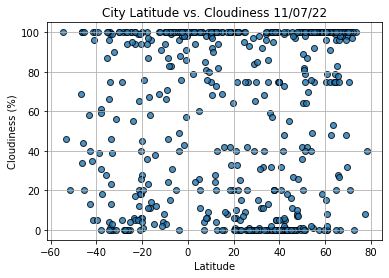

In [8]:
# build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="k", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./weather_data/Fig3.png")

# show plot
plt.show()

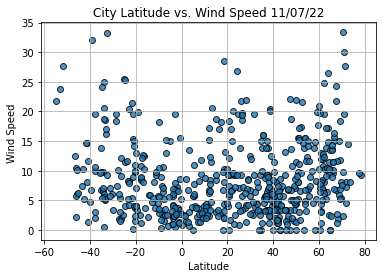

In [9]:
# build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="k", linewidths=1, marker="o",
           alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed ")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./weather_data/Fig4.png")

# show plot
plt.show()

## Create linear regression for every plot

In [3]:
#Creata a function to create perform linear regression on the weather data 
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"The r value is:{r_value}")

### Create hemisphere data frames

In [4]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                        Alofi
Country                        NU
Date          2022-10-30 01:01:59
Lat                      -19.0595
Lng                     -169.9187
Max Temp                    76.95
Humidity                       80
Cloudiness                     76
Wind Speed                  19.91
Name: 13, dtype: object

In [5]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
559     True
560     True
561     True
562     True
563     True
Name: Lat, Length: 564, dtype: bool

In [6]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [7]:
northern_hemi_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,2,Luquillo,PR,2022-10-30 01:01:53,18.3725,-65.7166,81.00,85,100,10.25
6,6,Klimovo,RU,2022-10-30 01:01:55,52.3805,32.1923,52.18,85,100,17.36
7,7,Aykhal,RU,2022-10-30 01:01:56,66.0000,111.5000,6.24,96,100,9.60
8,8,Butaritari,KI,2022-10-30 01:01:56,3.0707,172.7902,81.41,67,94,13.42
11,11,Leningradskiy,RU,2022-10-30 01:01:58,69.3833,178.4167,10.38,87,98,18.39


In [8]:
southern_hemi_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Mataura,NZ,2022-10-30 01:01:52,-46.1927,168.8643,67.48,48,34,10.49
1,1,Caxito,AO,2022-10-30 01:01:52,-8.5785,13.6643,76.77,88,87,2.73
3,3,Hualmay,PE,2022-10-30 01:01:53,-11.0964,-77.6139,62.10,81,4,9.28
4,4,Copiapo,CL,2022-10-30 01:01:54,-27.3667,-70.3333,53.29,59,0,1.92
5,5,Kindu,CD,2022-10-30 01:01:54,-2.9500,25.9500,70.36,99,100,0.45


### Linear regression on max temp for northern and southern hemisphere

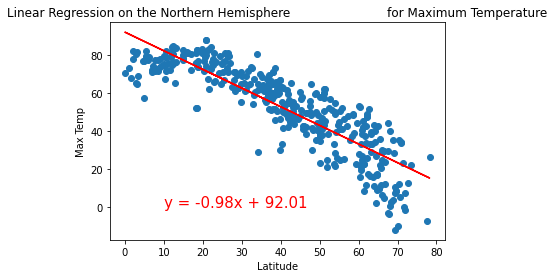

The r value is:-0.8656753521103142


In [9]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

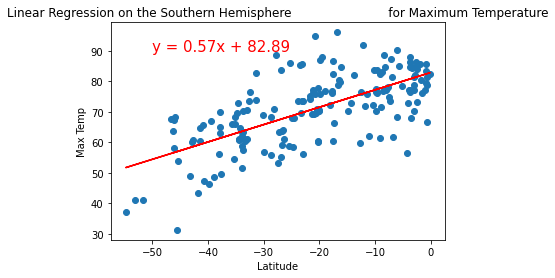

The r value is:0.6728320288643627


In [10]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

### Linear regression on humidity for northern and southern hemisphere

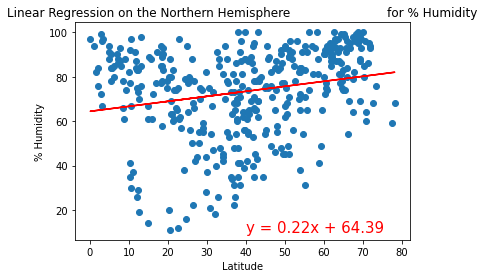

The r value is:0.22032058303702773


In [14]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

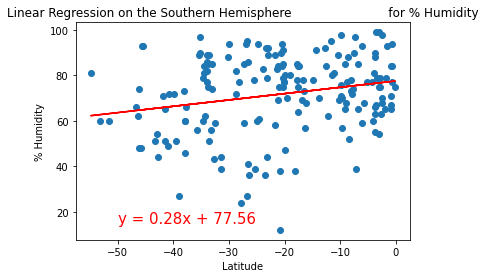

The r value is:0.22611911316599512


In [15]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

### Linear regression on percent cloudiness for northern and southern hemisphere

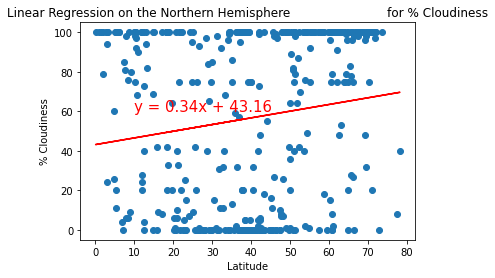

The r value is:0.15419520678952206


In [16]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

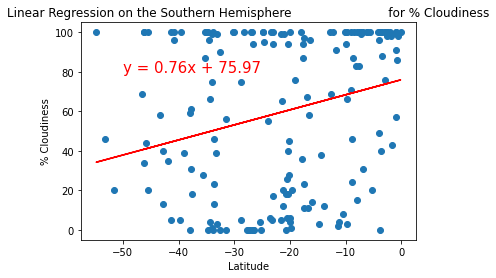

The r value is:0.26601588544464333


In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,80))

### Linear regression on Wind speed for northern and southern hemisphere

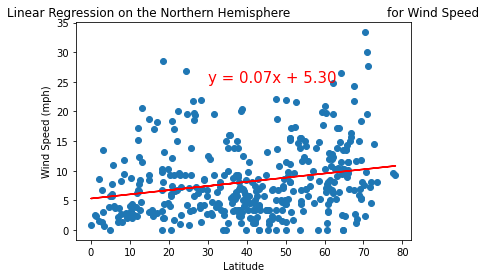

The r value is:0.22829751462973574


In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(30,25))

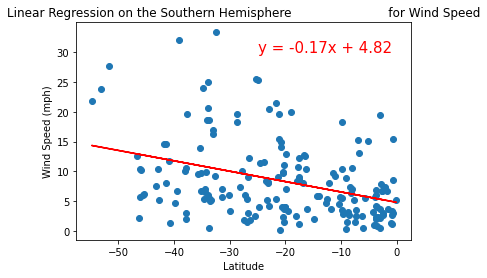

The r value is:-0.3684406037983845


In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-25,30))